# **Deep Learning Algorithms**

In this notebook , I will create models with neural networks.
I am using the dataset with all the features. So the first thing that comes to mind when we see a dataset with timestamps is to use recurrent neural networks. But I also want to try out other algorithms.

These are the algorithms that I want to implement:

*     Deep Neural Networks
*     convolutional Neural Networks
*     RNNs
    


# Importing and Balancing Data

In [2]:
import pandas as pd
from sklearn.utils import shuffle
X = pd.read_csv('/kaggle/input/meta-learning-dataset/Cond_X_Data.csv')
Y = pd.read_csv('/kaggle/input/meta-learning-dataset/Cond_Y_Data.csv')
data = X.merge(Y, on='Unnamed: 0')
ones = data[data['CLASS']==1].drop(['Unnamed: 0'] , axis=1)
zeros = data[data['CLASS']==0].sample(n=2340).drop(['Unnamed: 0'] , axis=1)
data = zeros.append(ones , ignore_index=True)
data = shuffle(data)
Y = data['CLASS']
X = data.drop('CLASS', axis = 1)

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
2866,-0.893999,0.168325,-0.045803,-0.026917,-0.206691,-0.405958,-0.799391,-0.793095,-0.300906,-0.600119,...,0.266877,-0.133485,-0.238828,-0.311296,-0.307970,-0.202997,-0.175366,-0.105990,-0.268926,-0.117650
3010,-0.064116,-0.007903,0.051709,-0.053621,-0.193045,-1.859568,-0.052331,0.236911,0.477474,0.589324,...,0.125842,-0.185319,-0.203341,-0.080435,0.037713,0.022746,-0.090098,-0.222290,-2.556385,0.487027
882,0.126831,-0.223293,0.006203,0.210075,0.028701,0.083272,0.057950,0.051945,0.097335,0.063503,...,-0.523926,-0.869537,-1.019536,-0.818185,-0.333387,-0.072567,-0.130224,-0.181838,-0.147468,-0.112694
900,0.306762,-0.552904,-0.845401,-0.681151,-0.489843,-0.490429,-0.600175,-0.339747,-0.239359,-0.070672,...,-0.307336,4.179157,-0.406122,-0.607399,-0.404557,-0.453823,-0.315807,0.247966,0.642009,0.724933
2672,-0.111852,-0.148233,-0.094559,0.079896,0.352791,0.414118,-0.002527,-0.013337,-0.293665,-0.299132,...,-0.302300,-0.491144,-0.213480,-0.090472,-0.292719,-0.378575,-0.456248,-0.434664,-0.284108,-0.752066


In [4]:
print(X.shape)
print(Y.shape)

(4680, 256)
(4680,)


In [5]:
Y.head()

2866    1
3010    1
882     0
900     0
2672    1
Name: CLASS, dtype: int64

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
X =  tf.convert_to_tensor(X)
Y = tf.convert_to_tensor(Y)
X = X.reshape(-1,1,X.shape[1])

2023-01-07 13:22:07.787722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 13:22:07.788805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 13:22:08.234576: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 13:22:08.235537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-07 13:22:08.236397: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Deep Neural Networks

In [21]:
model_dnn = tf.keras.Sequential()
model_dnn.add(tf.keras.layers.Dense(16, activation = tf.nn.relu))
#model_dnn.add(tf.keras.layers.Dropout(0.20))
model_dnn.add(tf.keras.layers.Dense(16, activation = tf.nn.relu))
#model_dnn.add(tf.keras.layers.Dropout(0.20))
model_dnn.add(tf.keras.layers.Dense(2 , activation  = tf.nn.softmax))
model_dnn.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_dnn.fit(X, Y , epochs = 5  ,validation_split=0.15)


Epoch 1/5
125/125 [==============================] - 2s 6ms/step - loss: 0.7240 - accuracy: 0.5028 - val_loss: 0.7198 - val_accuracy: 0.4801
Epoch 2/5
125/125 [==============================] - 1s 5ms/step - loss: 0.6772 - accuracy: 0.5636 - val_loss: 0.7151 - val_accuracy: 0.5057
Epoch 3/5
125/125 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.6043 - val_loss: 0.7224 - val_accuracy: 0.5157
Epoch 4/5
125/125 [==============================] - 0s 4ms/step - loss: 0.6325 - accuracy: 0.6423 - val_loss: 0.7299 - val_accuracy: 0.5328
Epoch 5/5
125/125 [==============================] - 0s 4ms/step - loss: 0.6071 - accuracy: 0.6745 - val_loss: 0.7403 - val_accuracy: 0.5427


As we can see above the training accuracy is 67% while validation accuray is only 54% , so even this minimal neural network is starting to overfit the data.So I didnt continue further

# Convolutional Neural Network (CNN)

In [42]:
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv1D(32,1,input_shape = (1,256) ,activation = "relu" ))
model_cnn.add(tf.keras.layers.Dropout(0.1))
model_cnn.add(tf.keras.layers.BatchNormalization())
model_cnn.add(tf.keras.layers.Conv1D(32,1, activation = "relu" ))
model_cnn.add(tf.keras.layers.Dropout(0.1))
model_cnn.add(tf.keras.layers.BatchNormalization())
'''model_cnn.add(tf.keras.layers.Conv1D(64 ,3,padding="same", activation="relu"))
model_cnn.add(tf.keras.layers.Dropout(0.1))
model_cnn.add(tf.keras.layers.BatchNormalization())'''
model_cnn.add(tf.keras.layers.GlobalMaxPool1D())
#model_cnn.add(tf.keras.layers.Dropout(0.1))
model_cnn.add(tf.keras.layers.BatchNormalization())
'''model_cnn.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model_cnn.add(tf.keras.layers.Dropout(0.1))'''
#model_cnn.add(tf.keras.layers.BatchNormalization())
#model_cnn.add(tf.keras.layers.Dense(64 , activation = tf.nn.relu))
model_cnn.add(tf.keras.layers.Dense(2 , activation  = tf.nn.softmax))
model_cnn.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_cnn.summary()
model_cnn.fit(X,Y,epochs = 5 ,validation_split=0.15)


Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_39 (Conv1D)           (None, 1, 32)             8224      
_________________________________________________________________
dropout_103 (Dropout)        (None, 1, 32)             0         
_________________________________________________________________
batch_normalization_100 (Bat (None, 1, 32)             128       
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 1, 32)             1056      
_________________________________________________________________
dropout_104 (Dropout)        (None, 1, 32)             0         
_________________________________________________________________
batch_normalization_101 (Bat (None, 1, 32)             128       
_________________________________________________________________
global_max_pooling1d_18 (Glo (None, 32)              

When I have choosen 64 units/channels in each CNN layers , the accuracy fell down for same number of epochs but increasing epochs increased overfitting. So I tried to make a model with minimum trainable parameters since we are running out of data and this the best I've found. And also using batch normalization greatly reduced overfitting.

# Recurrent Neural Networks (LSTMs)

In [9]:

model_rnn = tf.keras.models.Sequential()
model_rnn.add(tf.keras.layers.LSTM(32, input_shape=(1,256), return_sequences=True))
model_rnn.add(tf.keras.layers.Dropout(0.2))
model_rnn.add(tf.keras.layers.BatchNormalization())
model_rnn.add(tf.keras.layers.LSTM(32, return_sequences=True))
model_rnn.add(tf.keras.layers.Dropout(0.1))
model_rnn.add(tf.keras.layers.BatchNormalization())
model_rnn.add(tf.keras.layers.LSTM(64))
model_rnn.add(tf.keras.layers.Dropout(0.1))
model_rnn.add(tf.keras.layers.BatchNormalization())
'''model_rnn.add(tf.keras.layers.Dense(32, activation='relu'))
model_rnn.add(tf.keras.layers.Dropout(0.2))
model_rnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_rnn.add(tf.keras.layers.Dropout(0.2))
model_rnn.add(tf.keras.layers.BatchNormalization())'''
model_rnn.add(tf.keras.layers.Dense(2, activation='softmax'))
model_rnn.summary()
opt = tf.keras.optimizers.Adam(lr=0.003, decay=1e-6)
model_rnn.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model_rnn.fit(X, Y,batch_size=8,epochs=4,validation_split=0.15)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 32)             36992     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1, 32)             128       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 32)             8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 1, 32)             128       
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)               

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


498/498 [==============================] - 10s 10ms/step - loss: 0.7670 - accuracy: 0.4917 - val_loss: 0.6952 - val_accuracy: 0.5214
Epoch 2/4
498/498 [==============================] - 4s 8ms/step - loss: 0.6988 - accuracy: 0.5397 - val_loss: 0.7056 - val_accuracy: 0.5484
Epoch 3/4
498/498 [==============================] - 4s 8ms/step - loss: 0.6802 - accuracy: 0.5739 - val_loss: 0.6972 - val_accuracy: 0.5755
Epoch 4/4
498/498 [==============================] - 4s 8ms/step - loss: 0.6559 - accuracy: 0.6189 - val_loss: 0.6815 - val_accuracy: 0.6154


So far this was the best model I've found , maybe theres scope to imporve this so lets try optimizing hyperparameters

# HyperParameters Tuning

In [ ]:
import os
import tqdm
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow.keras.callbacks import TensorBoard
NAME = "MetaLearning"
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
No_of_RL = [1,2,3] #possible number of Recurrent Layers.
No_of_DL = [0,1,2,3] #possible number of Dense Layers
for current_RL in tqdm.tqdm(No_of_RL):
    for current_DL in No_of_DL:
        current_name = str(current_DL)+"-Dense" +str(current_RL)+"-Recurrent" + NAME
        model_rnnh = tf.keras.Sequential()
        model_rnnh.add(tf.keras.layers.LSTM(16, input_shape=(1,256), return_sequences=True))
        model_rnnh.add(tf.keras.layers.Dropout(0.1))
        model_rnnh.add(tf.keras.layers.BatchNormalization())
        for nRL in range(1 ,current_RL):#starting from one , since we already added a layer above
            model_rnnh.add(tf.keras.layers.LSTM(32, return_sequences=True))
            model_rnnh.add(tf.keras.layers.Dropout(0.1))
            model_rnnh.add(tf.keras.layers.BatchNormalization())

        for nDl in range(current_DL):
            model_rnnh.add(tf.keras.layers.Dense(32, activation='relu'))
            model_rnnh.add(tf.keras.layers.Dropout(0.1))
            model_rnnh.add(tf.keras.layers.BatchNormalization())
        model_rnnh.add(tf.keras.layers.Dense(2, activation='softmax'))
        opt = tf.keras.optimizers.Adam(lr=0.003, decay=1e-6)
        tensorboard = TensorBoard(log_dir="logs/{}".format(current_name))
        model_rnn.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
        model_rnn.fit(X, Y,epochs=4,validation_split=0.15 , callbacks=[tensorboard] , verbose = 0)

Since I was using kaggle , I could not open tensorboard in real time. So I've downloaded the final logs and ran TensorBoard on those logs locally and sharing the results here.
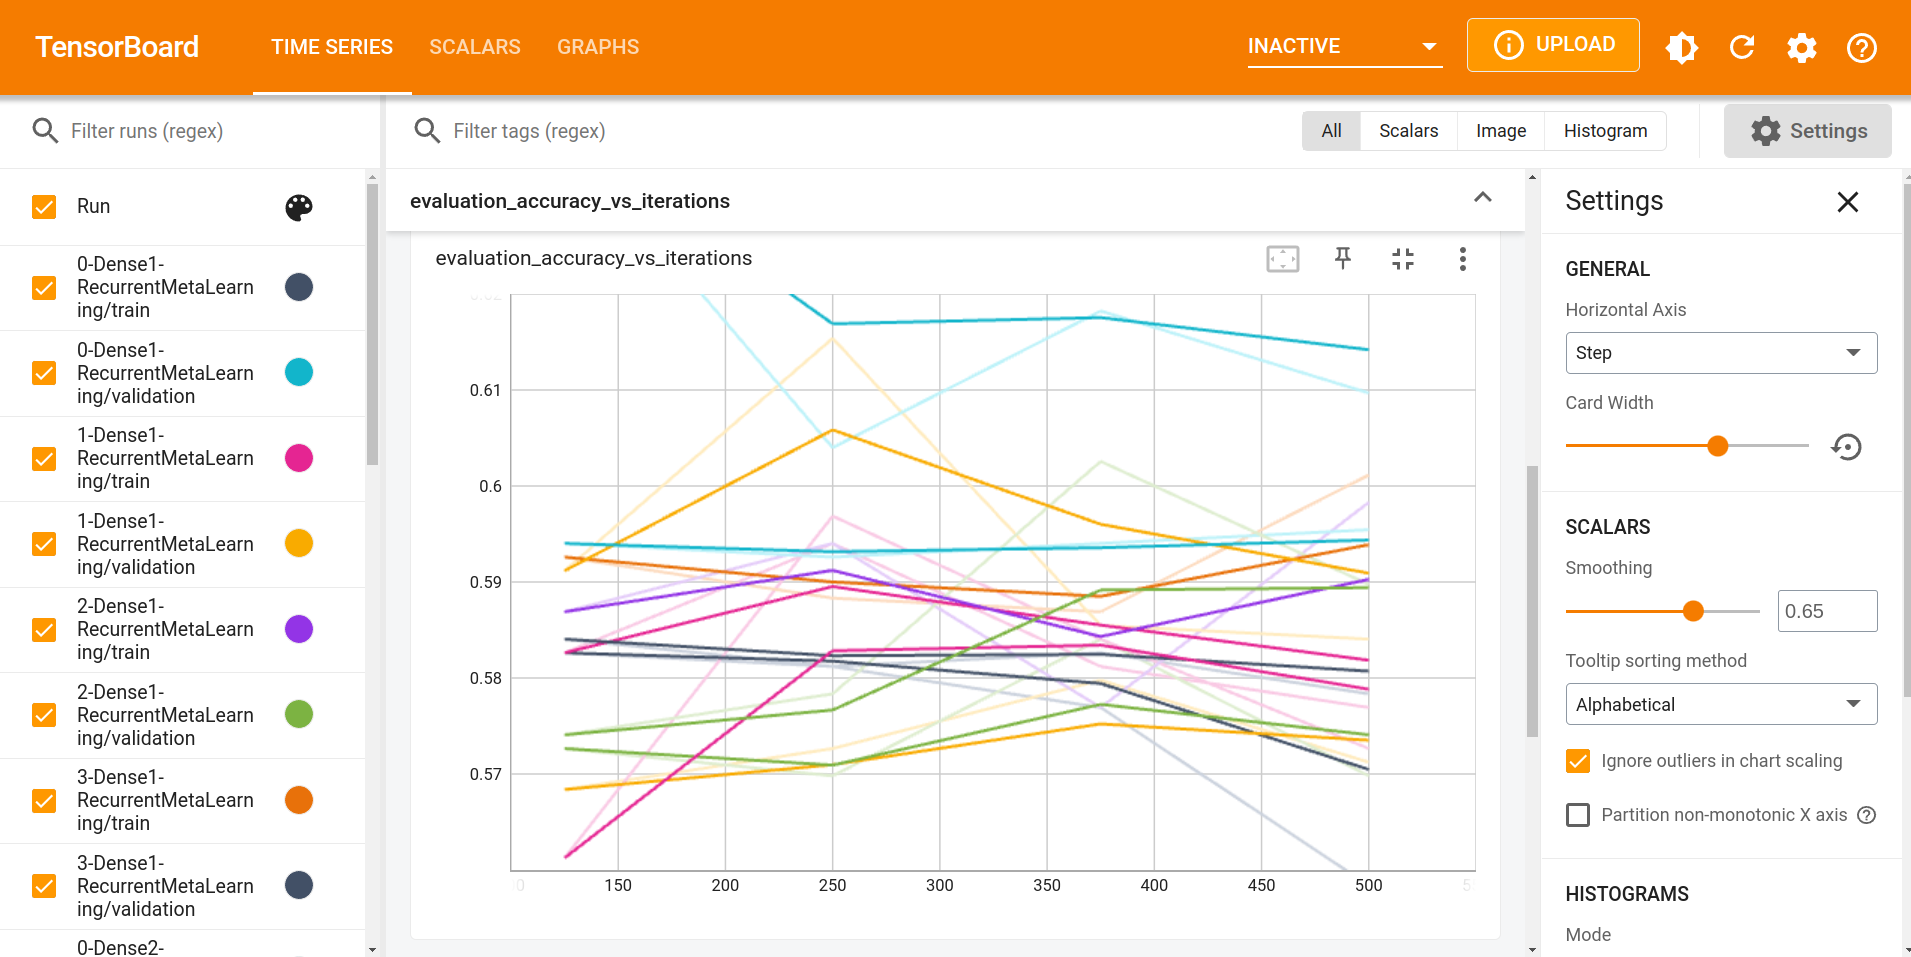
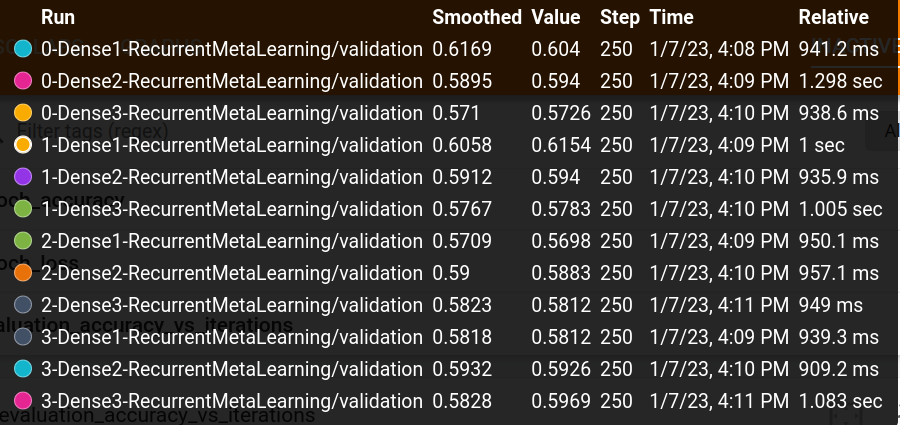

As we can see from the above stats the model with just one recurrent layer and zero dense layers was performing better than others , and this makes sense since the number of parameters to train with increasing layers increase and we dont have sufficiently large dataset to train all those layers. 

So  for further training we should use these hyperparamters to train the model

# Another trail

I have also chosen more minimal version of given dataset which was created by removing all the features that showed correlation greater than 0.5 , this way only 148 features were left in the dataset , since there are lesser number of features here we should be able to do better with the given ammount of data.(The performance would only improve if the chosen minimal dataset is good enough representaion of original data).

In [8]:
X_r = pd.read_csv('/kaggle/input/physionetreduced/new_cond_X_data.csv')
Y_r = pd.read_csv('/kaggle/input/physionetreduced/new_cond_Y_data.csv')
data_r = X_r.merge(Y_r, on='Unnamed: 0')
ones_r = data_r[data_r['CLASS']==1].drop(['Unnamed: 0'] , axis=1)
zeros_r = data_r[data_r['CLASS']==0].sample(n=2340).drop(['Unnamed: 0'] , axis=1)
data_r = zeros_r.append(ones_r , ignore_index=True)
data_r = shuffle(data_r)
Y_r = data_r['CLASS']
X_r = data_r.drop('CLASS', axis = 1)
X_r =  tf.convert_to_tensor(X_r)
Y_r = tf.convert_to_tensor(Y_r)
X_r = X_r.reshape(-1,1,X_r.shape[1])

In [9]:
X_r.shape

TensorShape([4680, 1, 148])

In [18]:

model_f = tf.keras.models.Sequential()
model_f.add(tf.keras.layers.LSTM(32, input_shape=(1,148), return_sequences=True))
model_f.add(tf.keras.layers.Dropout(0.2))
model_f.add(tf.keras.layers.BatchNormalization())
'''model_f.add(tf.keras.layers.LSTM(32, return_sequences=True))
model_f.add(tf.keras.layers.Dropout(0.1))
model_f.add(tf.keras.layers.BatchNormalization())
model_f.add(tf.keras.layers.LSTM(64))
model_f.add(tf.keras.layers.Dropout(0.1))
model_f.add(tf.keras.layers.BatchNormalization())'''
'''model_f.add(tf.keras.layers.Dense(32, activation='relu'))
model_.add(tf.keras.layers.Dropout(0.2))'''
'''model_f.add(tf.keras.layers.Dense(32, activation='relu'))
model_f.add(tf.keras.layers.Dropout(0.2))
model_f.add(tf.keras.layers.BatchNormalization())'''
model_f.add(tf.keras.layers.Dense(2, activation='softmax'))
model_f.summary()
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model_f.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model_f.fit(X_r, Y_r,batch_size=8,epochs=6,validation_split=0.15)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 1, 32)             23168     
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 1, 32)             128       
_________________________________________________________________
dense_15 (Dense)             (None, 1, 2)              66        
Total params: 23,362
Trainable params: 23,298
Non-trainable params: 64
_________________________________________________________________
Epoch 1/6
498/498 [==============================] - 4s 6ms/step - loss: 0.8665 - accuracy: 0.5128 - val_loss: 0.7487 - val_accuracy: 0.5085
Epoch 2/6
498/498 [==============================] - 2s 4ms/step - loss: 0.6738 - accuracy: 0.5968 - val_l

Though performance didnt change, overfitting increased in this dataset with these parameters. So for now its better if we stick to the dataset with 256 features/timestamps

So in conclusion , though the orginal dataset contained 18k samples , the balanced data only has 6.3k samples , which is not decent to train a deep learning model , and since we had gigantic 256 features in our samples , the classic machine learning algorithms didnt do well as well. Perfroming PCA was of no use as well , since it shows 266 principal features to include.

Though I couldnt find a model with decent accuray , it has been a good learning experience 